In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

line equation:

# $$y = m \cdot x + c$$

standard distribution:
### $$\mathcal{N}(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot \exp \left( {-\frac{(x - \mu)^2}{2 \sigma^2}} \right)$$

let the prediction be : 

# $$y = \hat{m} \cdot x + \hat{c}$$

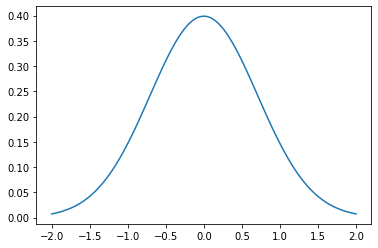

In [2]:
X = np.linspace(-2, 2, 100)
u = 0
sigma = 1
y = np.exp(- ((X - u) / sigma) * ((X - u) / sigma)) / (sigma * np.sqrt(2 * np.pi))

plt.plot(X, y)

In [3]:
def synthetic_data(slope, offset, n):
    X = np.random.normal(5, 2, n)
    y = np.dot(X, slope) + offset
    # adding some error
    y += np.random.normal(0, 3, y.shape)
    return X, y

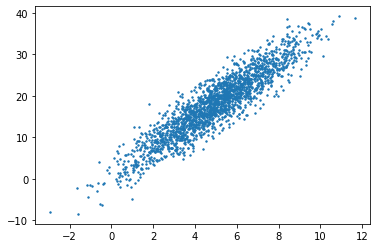

In [4]:
real_slope, real_offset = 3.4, 1.2
X, y = synthetic_data(real_slope, real_offset, 2000)
plt.scatter(X, y, 2)

In [5]:
def ml(input, slope_predicted, offset_predicted):
    return input * slope_predicted + offset_predicted

In [6]:
def real_val(input):
    return input * real_slope + real_offset

loss function:

# $$\Delta_{\hat{m}, \hat{c}} = \underbrace{\hat{m} \cdot x + \hat{c}}_{\text{predicted}} - y$$



# $$l_{\hat{m}, \hat{c}} = \frac{\Delta_{\hat{m}, \hat{c}}^2}{2}$$

In [7]:
def loss(predicted, actual):
    return (predicted - actual) ** 2 / 2

# $$\frac {\partial l_{\hat{m}, \hat{c}}}{\partial \hat{m}} = x (\hat{m} \cdot x + \hat{c})$$
# $$\frac {\partial l_{\hat{m}, \hat{c}}}{\partial \hat{c}} = \hat{m} \cdot x + \hat{c}$$

# $$\hat{m}\leftarrow \hat{m} - \eta \delta_\hat{m}$$
# $$\hat{c}\leftarrow \hat{c} - \eta \delta_\hat{c}$$

where

# $$\eta = \text{learning rate}$$

In [8]:
def train(slope, offset, train_data, test_data, batch_size, lr):
    # loop runs in epochs
    for i in range(0, batch_size):
        # getting the minibatch
        batch = train_data
        # model predictions
        predictions = ml(batch[0], slope, offset)
        # calculating gradients
        slope -= lr * np.dot(batch[0].transpose(), (predictions - batch[1])) / len(batch[0]) 
        offset -= lr * np.sum(predictions - batch[0]) / len(batch[0])
        print(f'Epoch {i} : loss = {sum(loss(ml(test_data[0], slope, offset), test_data[1])) / len(test_data[0])}')
    return slope, offset

Epoch 0 : loss = 172.95896335726403
Epoch 1 : loss = 145.0637212843806
Epoch 2 : loss = 121.85232123016571
Epoch 3 : loss = 102.53402106840532
Epoch 4 : loss = 86.45199035153382
Epoch 5 : loss = 73.06059605532327
Epoch 6 : loss = 61.90654435913358
Epoch 7 : loss = 52.61322356642161
Epoch 8 : loss = 44.867704520317204
Epoch 9 : loss = 38.40994721840673
Epoch 10 : loss = 33.023838990744494
Epoch 11 : loss = 28.529753241248176
Epoch 12 : loss = 24.778370577777153
Epoch 13 : loss = 21.645548007157092
Epoch 14 : loss = 19.02805827289671
Epoch 15 : loss = 16.840051631010073
Epoch 16 : loss = 15.01011744380467
Epoch 17 : loss = 13.478843794838742
Epoch 18 : loss = 12.196790614411011
Epoch 19 : loss = 11.122806154861184
Epoch 20 : loss = 10.222628567456422
Epoch 21 : loss = 9.467724221801019
Epoch 22 : loss = 8.834322618258556
Epoch 23 : loss = 8.302614559149939
Epoch 24 : loss = 7.8560859023355825
Epoch 25 : loss = 7.480963917823164
Epoch 26 : loss = 7.165757167468408
Epoch 27 : loss = 6.9008

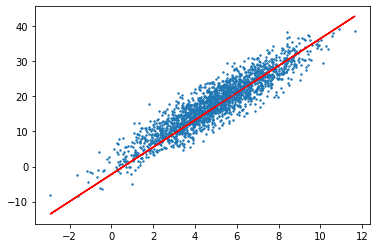

In [14]:
train_data = [X[:1500], y[:1500]]
test_data = [X[1500:], y[1500:]]
slope, offset = train(0, -1, train_data, test_data, 50, 0.003)
plt.scatter(X, y ,2)
plt.plot(X, slope * X + offset, 'r')